In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('drive/My Drive/Machine Learning A_to_Z/Linear Regression/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [30]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values
y=np.reshape(y,(-1,1))

# feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# fitting SVR to dataset

In [32]:
from sklearn.svm import SVR
regressor  =SVR(kernel='rbf')
regressor.fit(X , y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# predicting new result

In [44]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([6.5]).reshape(1, -1))))

ValueError: ignored

#Visualizing SVR results

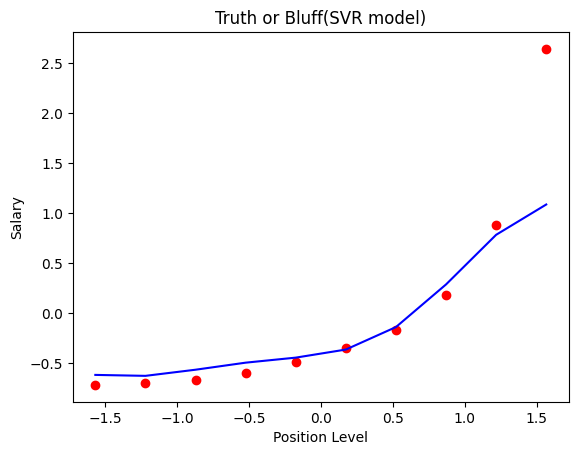

In [46]:
X_grid = np.arange(min(X) , max(X) , 0.1)
X_grid = X_grid.reshape((len(X_grid) , 1))
plt.scatter(X , y ,color='red')
plt.plot(X , regressor.predict(X) , color='blue')
plt.title('Truth or Bluff(SVR model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()